In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kaggle-survey-2021/kaggle_survey_2021_responses.csv
/kaggle/input/kaggle-survey-2021/supplementary_data/kaggle_survey_2021_methodology.pdf
/kaggle/input/kaggle-survey-2021/supplementary_data/kaggle_survey_2021_answer_choices.pdf


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
<p style="padding: 10px;
           color:white;">

# The objective of the project
    
### 1.  To understand which type of the people who participate in the survey 

### 2.  To find out which coding language is the participant most recommanded

### 3.  To find out the presentage distribution of coding language is the participant currently using

### 4.  To show out the nationality of the participant in the survey
    
    
</p>
</div>

In [2]:
data = pd.read_csv('../input/kaggle-survey-2021/kaggle_survey_2021_responses.csv')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (0,195,201,285,286,287,288,289,290,291,292) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<div>
<p style="padding: 10px;
           color:blue;font-size:300%;">
Preview of Dataset
<\p>
<p style="padding: 10px;
           color:blue;font-size:150%;">
Show the first five line of the data to get the general idea of the dataset
<\p>
<\div>

In [3]:
data.head(5)

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN


<div>
<p style="padding: 10px;
           color:blue;font-size:150%;">
Find the size of dataset
<\p>
<\div>

In [4]:
data.shape

(25974, 369)

<div>
<p style="padding: 10px;
           color:blue;font-size:300%;">
Pre-processing of Data
<\p>
<p style="padding: 10px;
           color:blue;font-size:150%;">
Rename the useful columns for further processing
<\p>
<\div>

In [5]:
data.drop([0],inplace = True)
data = data.rename(columns={'Time from Start to Finish (seconds)': 'Duration', 'Q1': 'Age' , 
                            'Q2':'Gender','Q3':'Country','Q4':'Education','Q5':'Job Title',
                            'Q6':'Experience Years','Q7_Part_1':'Python','Q7_Part_2':'R',
                            'Q7_Part_3':'SQL','Q7_Part_4':'C','Q7_Part_5':'C++','Q7_Part_6':'Java',
                            'Q7_Part_7':'Javascript','Q7_Part_8':'Julia','Q7_Part_9':'Swift',
                            'Q7_Part_10':'Bash','Q7_Part_11':'MATLAB','Q7_Part_12':'None',
                            'Q7_OTHER':'Other','Q8':'Recommended'})

In [6]:
data.head(5)

,Duration,Age,Gender,Country,Education,Job Title,Experience Years,Python,R,SQL,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
5,781,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<p style="padding: 10px;
           color:blue;font-size:150%;">
Select the useful column
<\p>

In [7]:
data_setA = data.iloc[:,0:21]
data_setA.head(5)

,Duration,Age,Gender,Country,Education,Job Title,Experience Years,Python,R,SQL,...,C++,Java,Javascript,Julia,Swift,Bash,MATLAB,None,Other,Recommended
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,C++,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,...,C++,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python
5,781,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,MATLAB,NaN,NaN,Python


<div>
<p style="padding: 10px;
           color:blue;font-size:300%;">
Objective 1:
<\p>
<p style="padding: 10px;
           color:blue;font-size:150%;">
To understand which type of the people who participate in the survey
<\p>
<\div>

In [8]:
job_title_count=data_setA['Job Title'].value_counts()
job_title_count

Student                         6804
Data Scientist                  3616
Software Engineer               2449
Other                           2393
Data Analyst                    2301
Currently not employed          1986
Research Scientist              1538
Machine Learning Engineer       1499
Business Analyst                 968
Program/Project Manager          849
Data Engineer                    668
Product Manager                  319
Statistician                     313
DBA/Database Engineer            171
Developer Relations/Advocacy      99
Name: Job Title, dtype: int64

<div>
<p style="padding: 10px;
           color:red;font-size:300%;">
Key finding:
<\p>
<p style="padding: 10px;
           color:red;font-size:150%;">
Most of the participant is a student and data Scientist is the second mosty
<\p>
<\div>

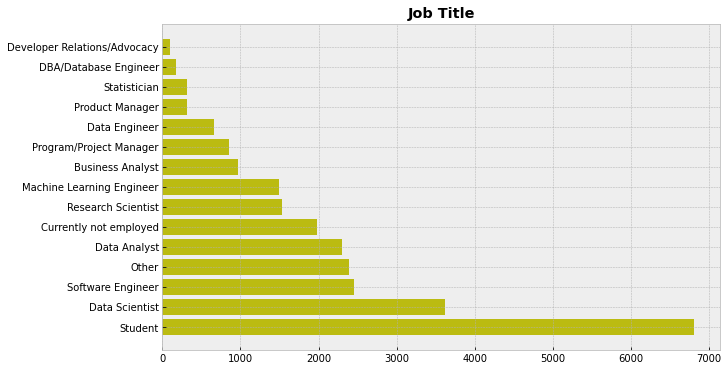

In [9]:
ds = data_setA['Job Title'].value_counts().reset_index()
ds.columns = ['Job Title','count']
plt.style.use('bmh')
plt.figure(figsize=(10,6))
plt.barh(ds['Job Title'],ds['count'],color='#BBBB11',height=0.8)
plt.title("Job Title",fontweight='bold')
plt.show()

<p style="padding: 10px;
           color:blue;font-size:300%;">
Objective 2:
<\p>
<p style="padding: 10px;
           color:blue;font-size:150%;">
To find out which coding language is the participant most recommanded
<\p>
<p style="padding: 10px;
           color:red;font-size:300%;">
Key finding:
<\p>
<p style="padding: 10px;
           color:red;font-size:150%;">
Python is the most recommanded coding langauge in the survey and it's nearly ten times more when compare with R and SQL.
<\p>

<AxesSubplot:xlabel='Recommended', ylabel='count'>

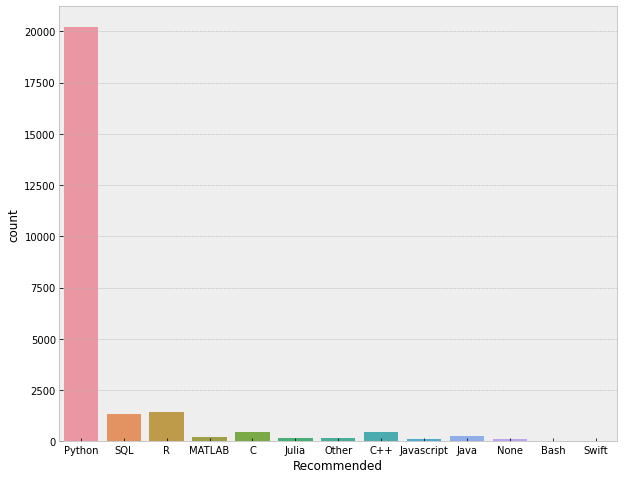

In [10]:
plt.figure(figsize= (10, 8))
sns.countplot(x= data['Recommended'], data= data_setA)

<div>
<p style="padding: 10px;
           color:blue;font-size:300%;">
Objective 3:
<\p>
<p style="padding: 10px;
           color:blue;font-size:150%;">
To find out the presentage distribution of coding language is the participant currently using
<\p>
<\div>

In [11]:
Python=data_setA['Python'].count()
R=data_setA['R'].count()
SQL=data_setA['SQL'].count()
C=data_setA['C'].count()
C_plus=data_setA['C++'].count()
Java=data_setA['Java'].count()
Javascript=data_setA['Javascript'].count()
Julia=data_setA['Julia'].count()
Swift=data_setA['Swift'].count()
Bash=data_setA['Bash'].count()
MATLAB=data_setA['MATLAB'].count()
none=data_setA['None'].count()
Other=data_setA['Other'].count()
labels = ['Python',
 'R',
 'SQL',
 'C',
 'C++',
 'Java',
 'Javascript',
 'Julia',
 'Swift',
 'Bash',
 'MATLAB',
 'None',
 'Other']
values = [Python,
 R,
 SQL,
 C,
 C_plus,
 Java,
 Javascript,
 Julia,
 Swift,
 Bash,
 MATLAB,
 none,
 Other]
code_language = pd.DataFrame(labels)
code_language = code_language.rename(columns={0: 'Coding language'})
code_language.insert(1,column='frequency',value= values)
code_language

,Coding language,frequency
0,Python,21860
1,R,5334
2,SQL,10756
3,C,4709
4,C++,5535
5,Java,4769
6,Javascript,4332
7,Julia,305
8,Swift,242
9,Bash,2216


<p style="padding: 10px;
           color:red;font-size:300%;">
Key finding:
<\p>
<p style="padding: 10px;
           color:red;font-size:150%;">
Python is the most popular coding langauge in the survey and the SQL got the second most.
<\p>

In [12]:
import plotly.express as px

fig = px.pie(code_language, values='frequency', names='Coding language', title='Percentage Distribution of Coding Language ')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

<div>
<p style="padding: 10px;
           color:blue;font-size:300%;">
Objective 4:
<\p>
<p style="padding: 10px;
           color:blue;font-size:150%;">
To show the nationality distribution of the participant in the survey
<\p>
<\div>

In [13]:
#import plotly.plotly as plt --deprecated
import plotly.graph_objs as gob
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode, plot, iplot

#data = plotdata.reset_index(drop=True)
init_notebook_mode(connected = True)
cf.go_offline()
cols = ['Country']
#Convert value counts to data_setA
user_count =pd.DataFrame(data_setA[cols].value_counts())
df_usercount = user_count.reset_index()
df_usercount.columns = ['Country', 'User_count']


print(df_usercount)
df_usercount.iplot(kind ='barh', x='Country', y='User_count')


/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning:

The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.



                     Country  User_count
0                      India        7434
1   United States of America        2650
2                      Other        1270
3                      Japan         921
4                      China         814
..                       ...         ...
61                    Norway          45
62                Kazakhstan          45
63                   Algeria          44
64                      Iraq          43
65                  Ethiopia          43

[66 rows x 2 columns]


<p style="padding: 10px;
           color:red;font-size:300%;">
Key finding:
<\p>
<p style="padding: 10px;
           color:red;font-size:150%;">
Most of the participant is come from India and United States of America is the second most.
<\p>

In [14]:
# iplot global map 
fig = gob.Figure(data=gob.Choropleth(
    locations = df_usercount['Country'],
    locationmode='country names',
    z = df_usercount['User_count'],
    text = df_usercount['Country'],
    colorscale = 'spectral',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '',
    colorbar_title = 'Geo wide distribution',
))

fig.update_layout(
    title_text='2021 Kaggle User Survey Global Map',
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.45,
        y=0.14,
        xref='paper',
        yref='paper',
        text='Data Source: 2021 Kaggle Machine Learning & Data Science Survey',
        showarrow = False
    )]
)
iplot(fig)